<a href="https://colab.research.google.com/github/KavyaR76/Projectss/blob/main/Stock_Market_Analysis_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import rcParams

# Upload datasets
from google.colab import files
uploaded = files.upload()



Saving AMZN_2006-01-01_to_2018-01-01.csv to AMZN_2006-01-01_to_2018-01-01.csv
Saving GOOGL_2006-01-01_to_2018-01-01.csv to GOOGL_2006-01-01_to_2018-01-01.csv
Saving MSFT_2006-01-01_to_2018-01-01.csv to MSFT_2006-01-01_to_2018-01-01.csv


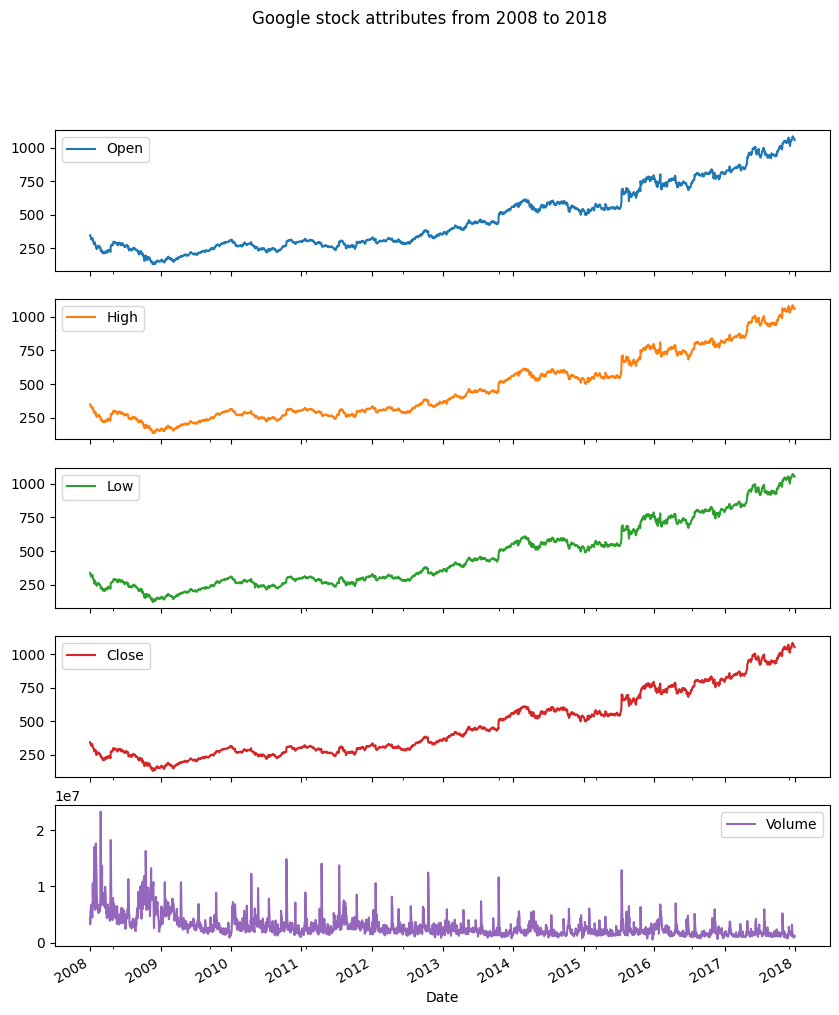

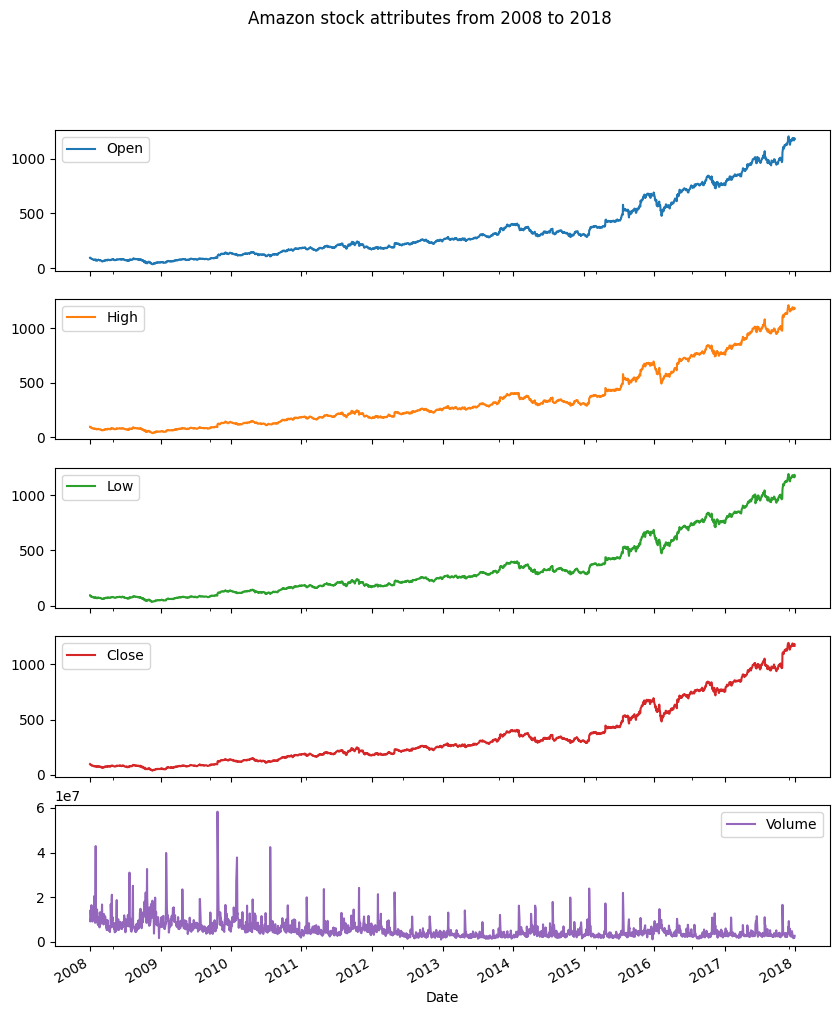

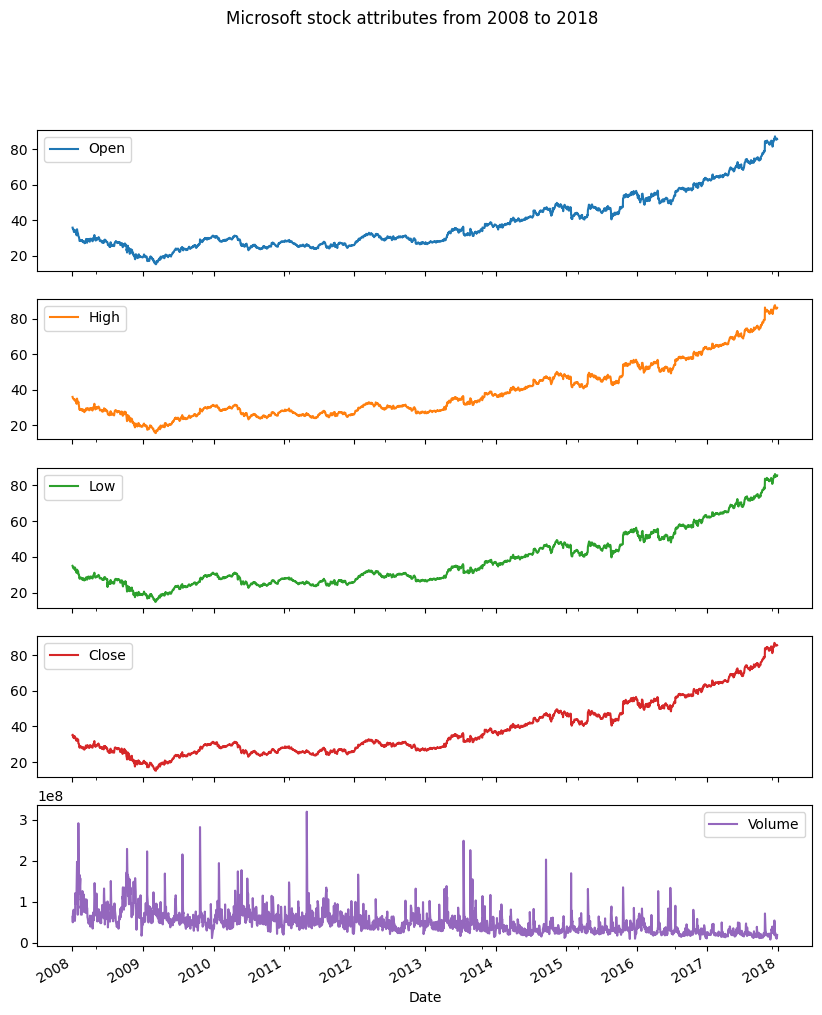

In [ ]:
# Load the datasets
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=True)
amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=True)
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=True)

# Filter data from 2008 to 2018
google = google['2008':'2018']
amazon = amazon['2008':'2018']
microsoft = microsoft['2008':'2018']

# Plot stock attributes
def plot_stock_attributes(df, name):
    df.plot(subplots=True, figsize=(10,12))
    plt.suptitle(f'{name} stock attributes from 2008 to 2018')
    plt.show()

plot_stock_attributes(google, 'Google')
plot_stock_attributes(amazon, 'Amazon')
plot_stock_attributes(microsoft, 'Microsoft')


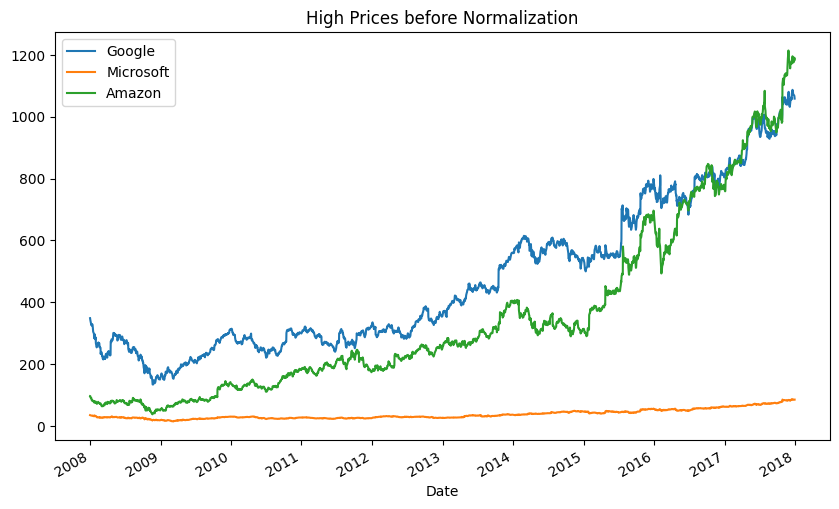

In [ ]:
# Plotting High prices before normalization
plt.figure(figsize=(10, 6))
google.High.plot(label='Google')
microsoft.High.plot(label='Microsoft')
amazon.High.plot(label='Amazon')
plt.legend()
plt.title('High Prices before Normalization')
plt.show()


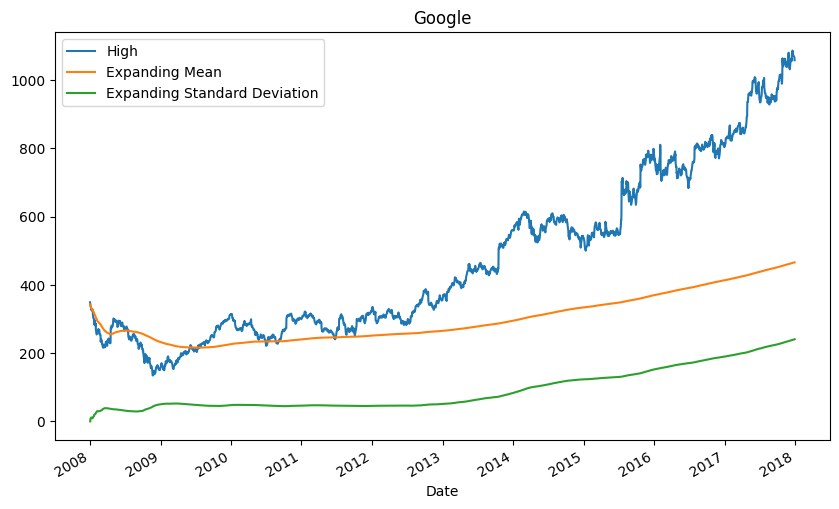

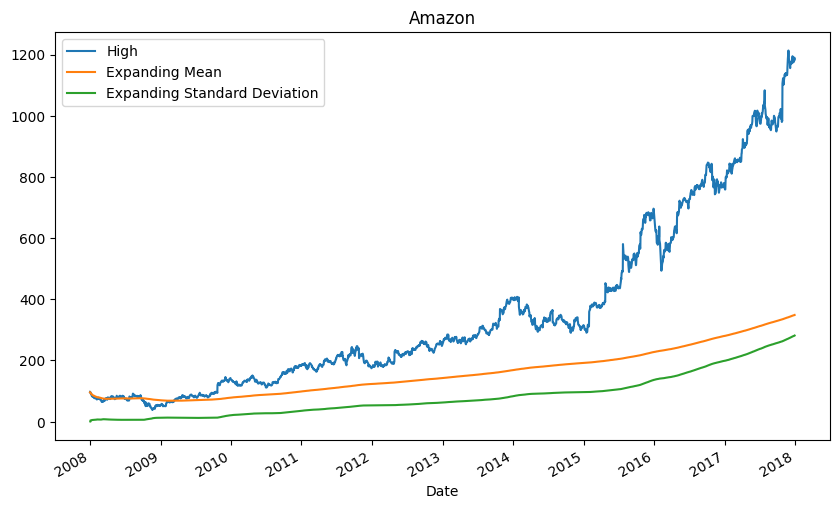

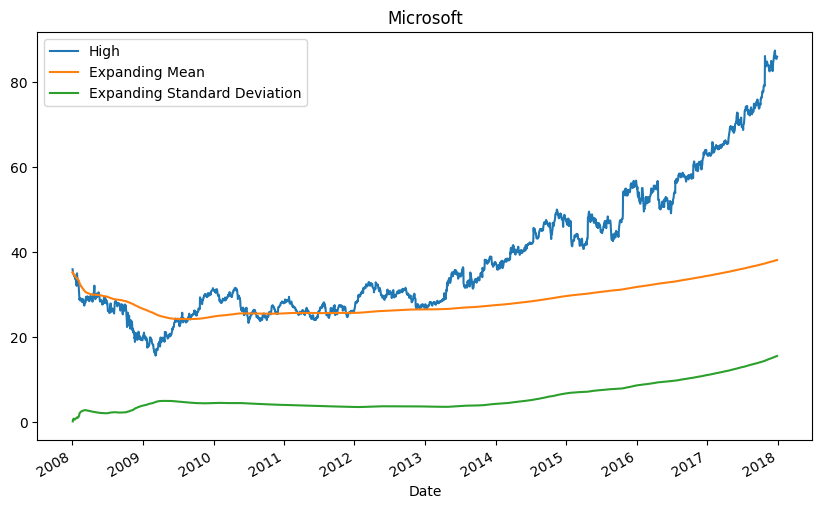

In [ ]:
# Expanding window functions
def plot_expanding_window(df, name):
    df_mean = df.Close.expanding().mean()
    df_std = df.Close.expanding().std()
    plt.figure(figsize=(10, 6))
    df.High.plot(label='High')
    df_mean.plot(label='Expanding Mean')
    df_std.plot(label='Expanding Standard Deviation')
    plt.legend()
    plt.title(name)
    plt.show()

plot_expanding_window(google, 'Google')
plot_expanding_window(amazon, 'Amazon')
plot_expanding_window(microsoft, 'Microsoft')


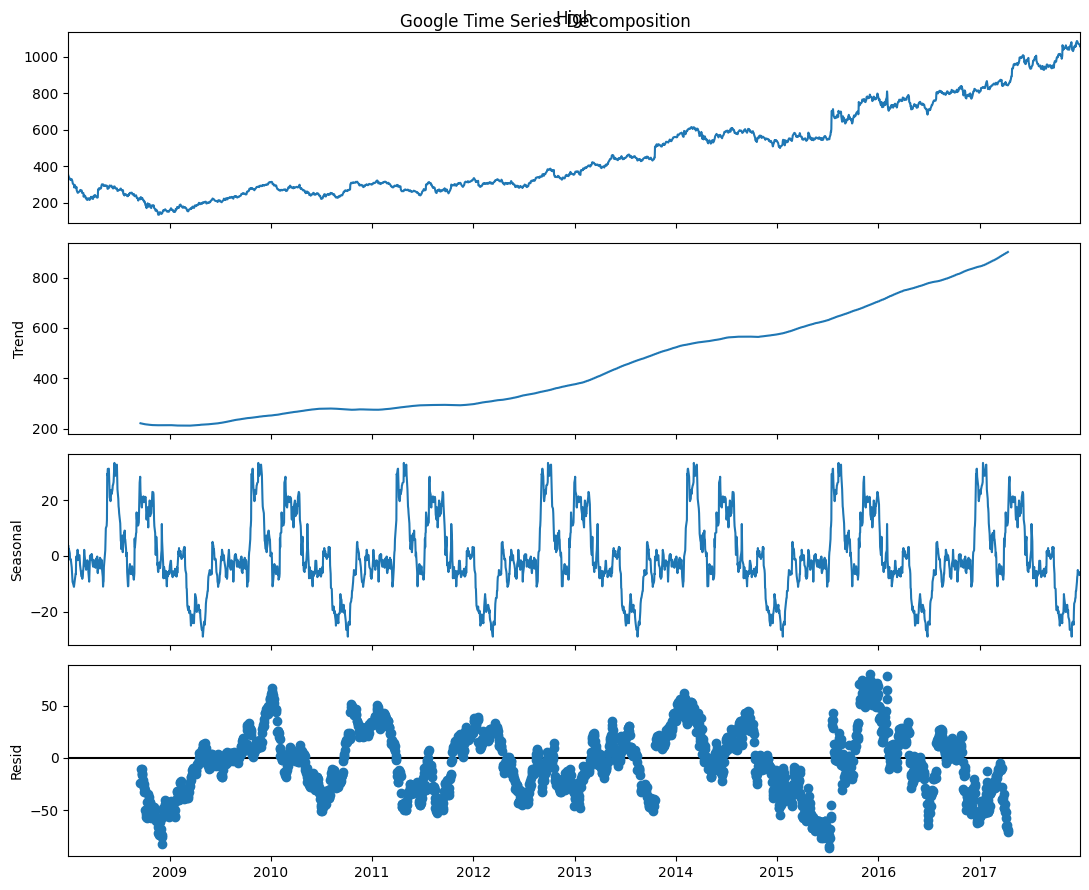

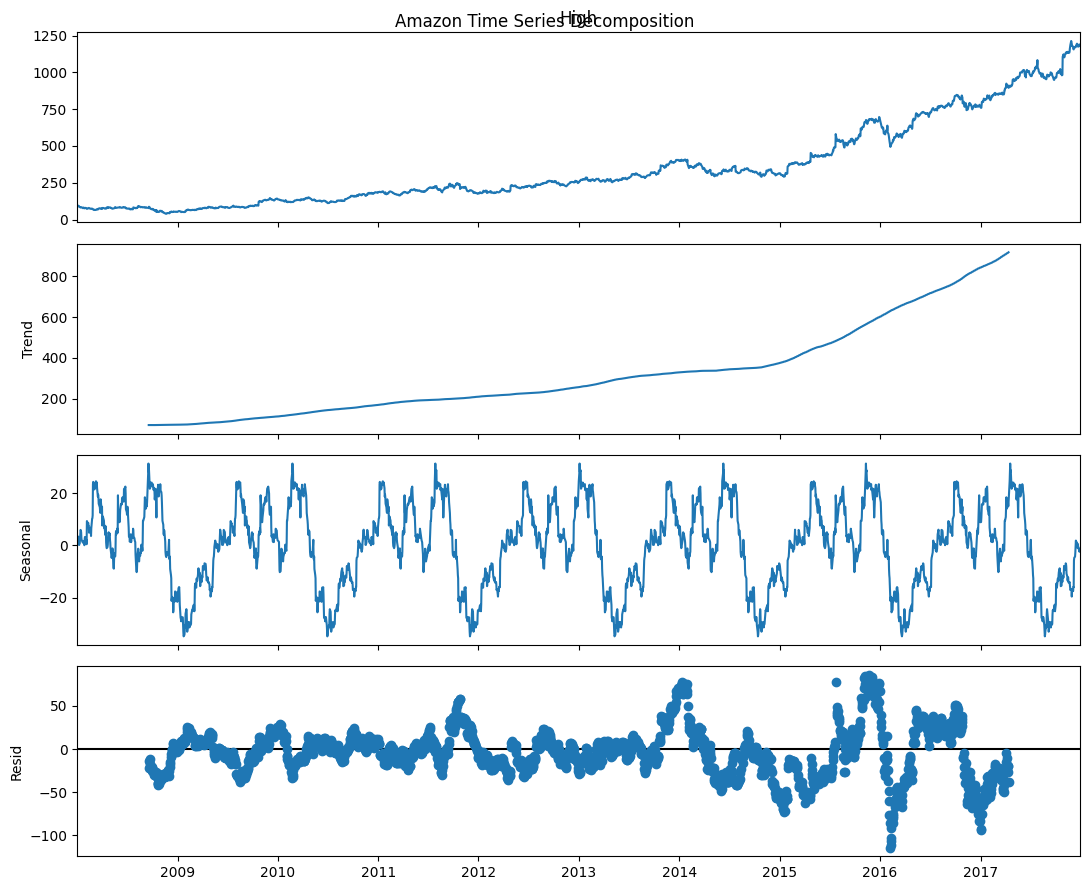

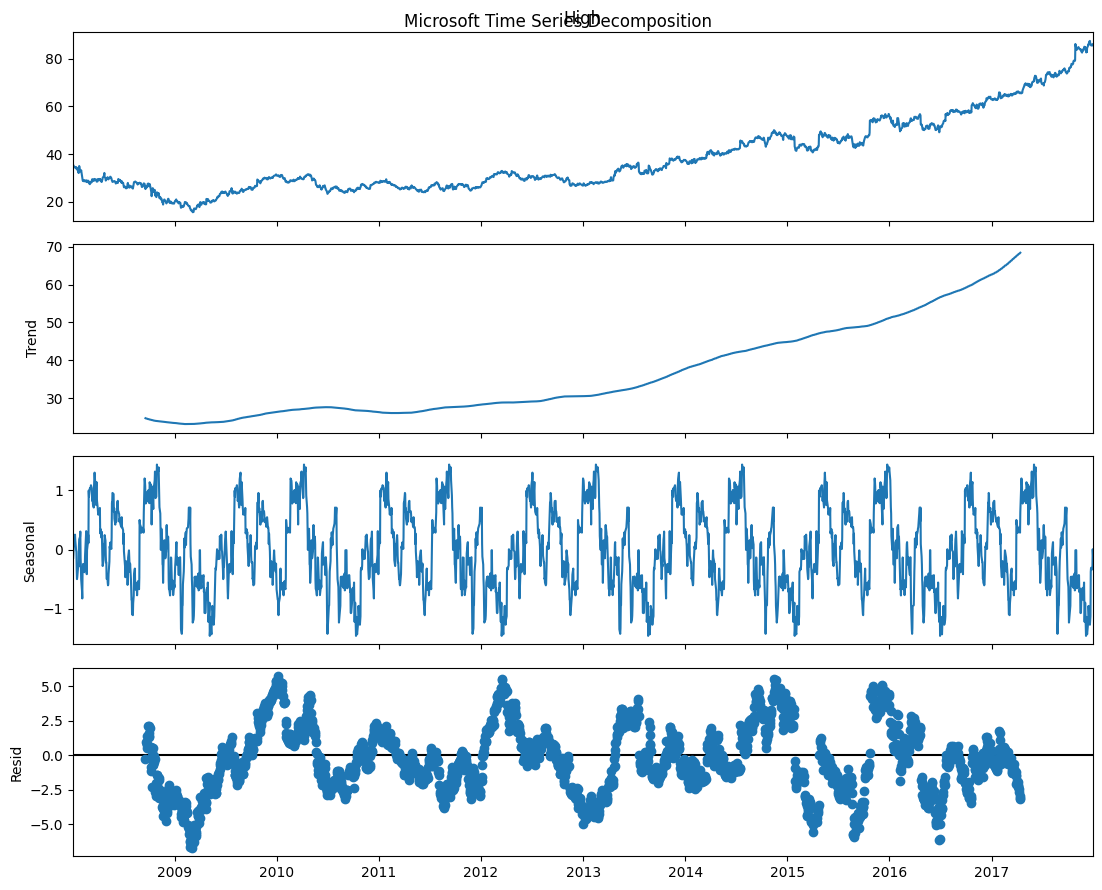

In [ ]:
# Time series decomposition
def plot_decomposition(df, name):
    rcParams['figure.figsize'] = 11, 9
    decomposed = sm.tsa.seasonal_decompose(df["High"], period=360)  # Assuming annual frequency
    decomposed.plot()
    plt.suptitle(f'{name} Time Series Decomposition')
    plt.show()

plot_decomposition(google, 'Google')
plot_decomposition(amazon, 'Amazon')
plot_decomposition(microsoft, 'Microsoft')


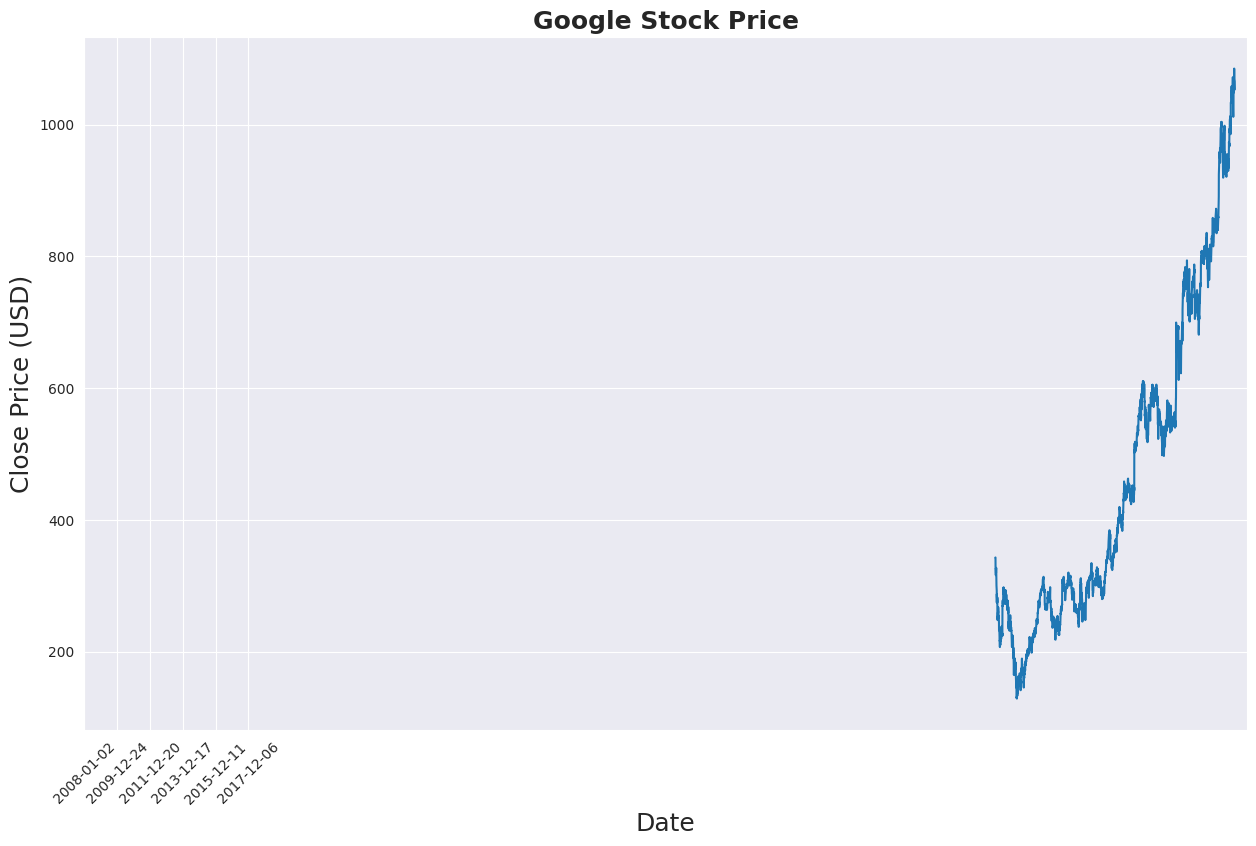

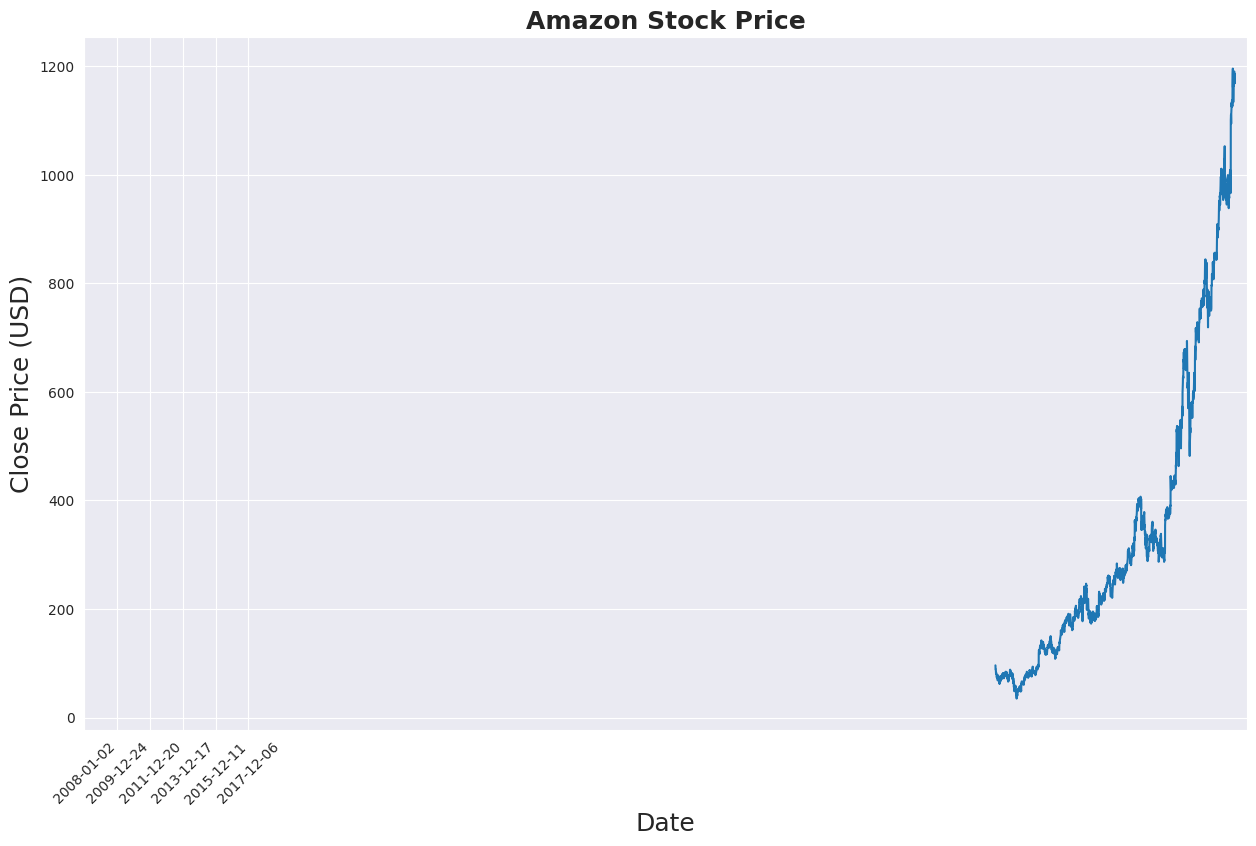

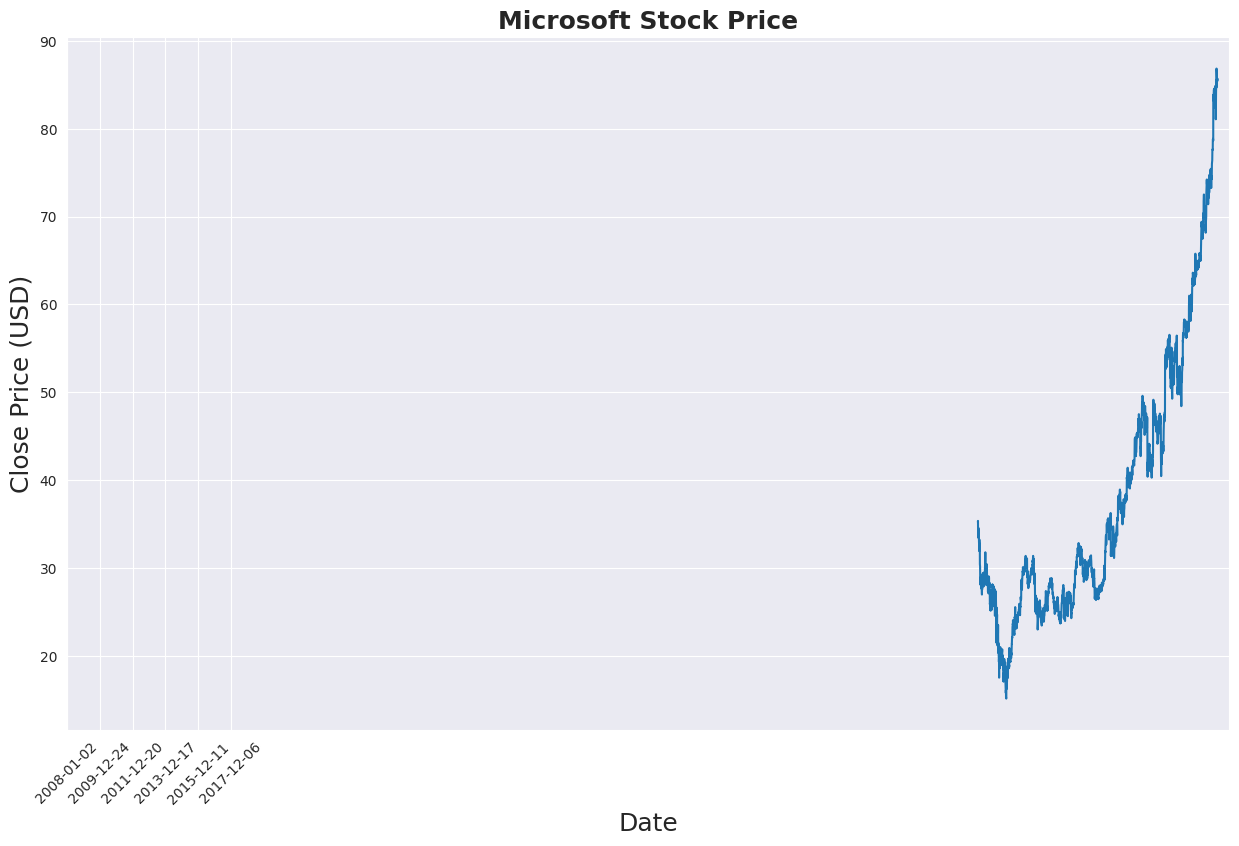

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the function to match the plotting style and requirements exactly
def plot_close_prices(df, name):
    sns.set_style("darkgrid")
    plt.figure(figsize=(15, 9))

    # Plotting the 'Close' prices directly from the DataFrame
    plt.plot(df['Close'])

    # Configuring x-ticks: range set to the length of the DataFrame, spacing set by 500, labels from the Date index
    plt.xticks(range(0, len(df), 500), df.index[::500].strftime('%Y-%m-%d'), rotation=45)

    # Setting titles and labels with the specified font sizes and styles
    plt.title(f"{name} Stock Price", fontsize=18, fontweight='bold')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price (USD)', fontsize=18)
    plt.show()

# Assuming google, amazon, and microsoft DataFrames have the 'Close' column and are indexed by Date

# Plotting Close Prices for Google, Amazon, and Microsoft
plot_close_prices(google, 'Google')
plot_close_prices(amazon, 'Amazon')
plot_close_prices(microsoft, 'Microsoft')



Training and evaluating model for Amazon...
Epoch [10/50], Loss: 0.4674
Epoch [20/50], Loss: 0.1663
Epoch [30/50], Loss: 0.0363
Epoch [40/50], Loss: 0.0159
Epoch [50/50], Loss: 0.0193
Test Loss: 0.2573


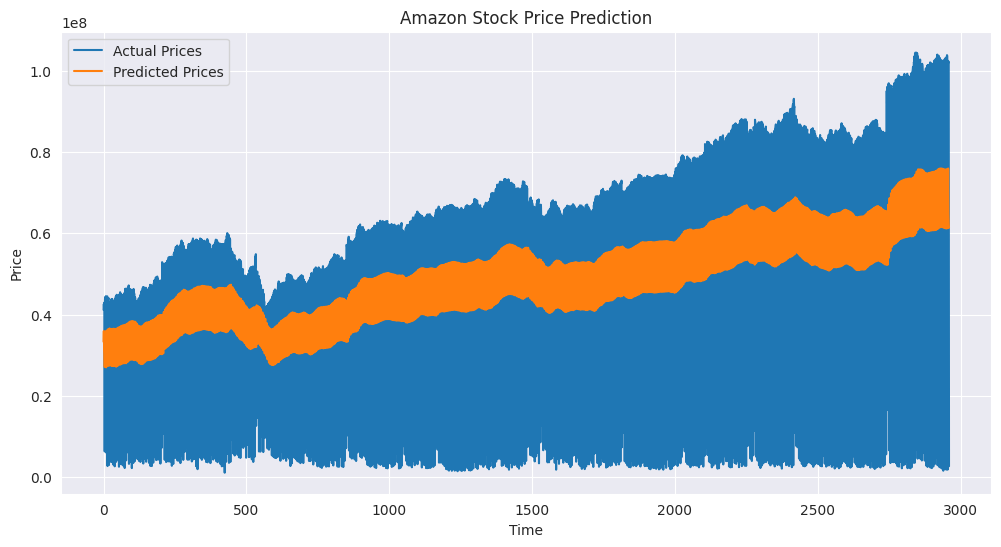

Training and evaluating model for Google...
Epoch [10/50], Loss: 0.2402
Epoch [20/50], Loss: 0.0671
Epoch [30/50], Loss: 0.0392
Epoch [40/50], Loss: 0.0204
Epoch [50/50], Loss: 0.0191
Test Loss: 0.1961


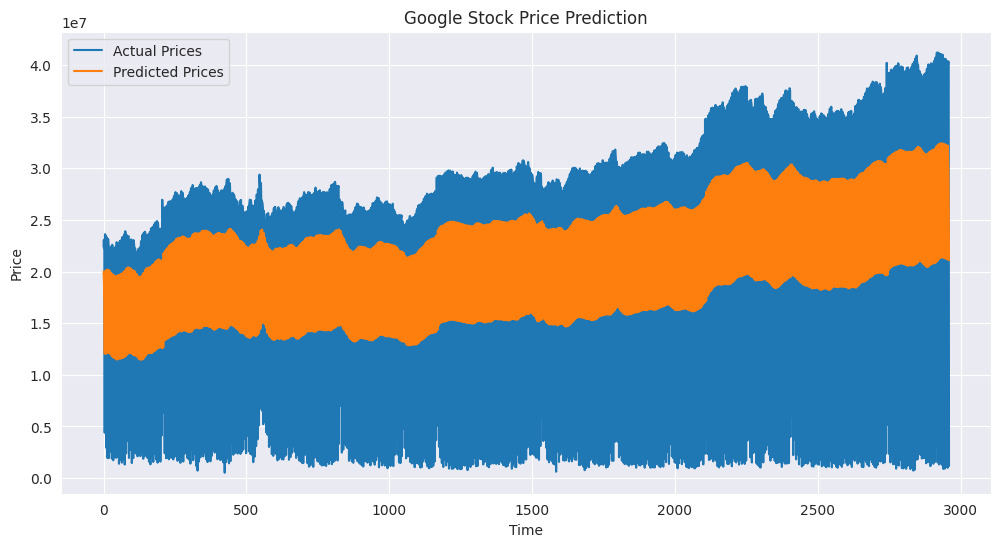

Training and evaluating model for Microsoft...
Epoch [10/50], Loss: 0.2454
Epoch [20/50], Loss: 0.0841
Epoch [30/50], Loss: 0.0318
Epoch [40/50], Loss: 0.0194
Epoch [50/50], Loss: 0.0174
Test Loss: 0.2732


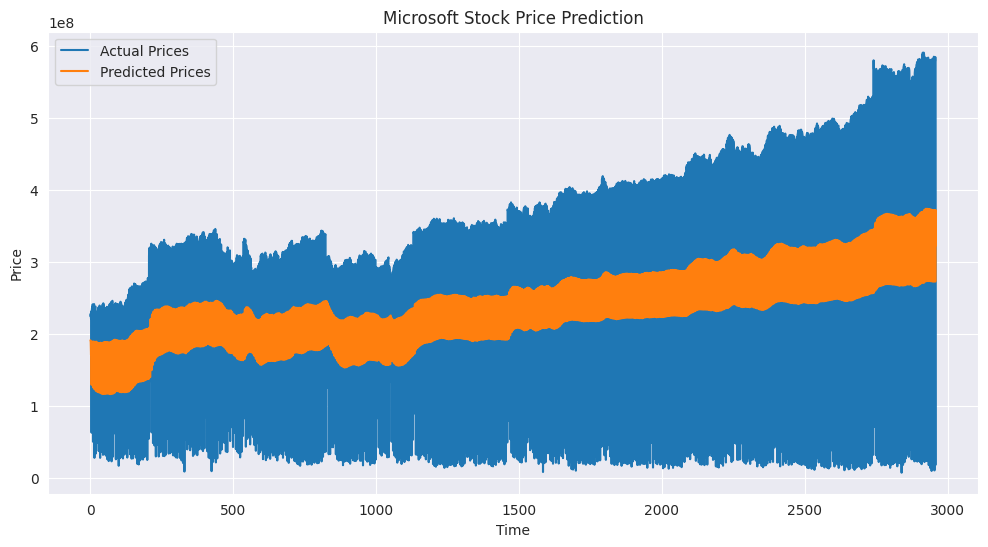

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from torch.autograd import Variable
import matplotlib.pyplot as plt


# Define GRU Model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# Function to create and return a model instance
def create_model(input_size, hidden_size, output_size):
    return GRUModel(input_size, hidden_size, output_size)

# Training function
def train_model(model, X_train, Y_train, epochs=50):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        inputs = Variable(torch.Tensor(X_train))
        labels = Variable(torch.Tensor(Y_train))

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation function
def evaluate_model(model, X_test, Y_test):
    model.eval()
    with torch.no_grad():
        inputs = Variable(torch.Tensor(X_test))
        labels = Variable(torch.Tensor(Y_test))
        outputs = model(inputs)
        loss = mean_squared_error(labels.numpy(), outputs.numpy())
        print(f'Test Loss: {loss:.4f}')
        return outputs.numpy()

# Function to plot predictions vs actual values
def plot_predictions(true_values, predicted_values, title):
    plt.figure(figsize=(12, 6))
    plt.plot(true_values, label='Actual Prices')
    plt.plot(predicted_values, label='Predicted Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Train and evaluate the model for each dataset
def train_and_evaluate(dataset_name, X_train, Y_train, X_test, Y_test, scaler):
    print(f"Training and evaluating model for {dataset_name}...")

    input_size = X_train.shape[2]
    hidden_size = 50
    output_size = Y_train.shape[1]

    model = create_model(input_size, hidden_size, output_size)
    train_model(model, X_train, Y_train)
    predictions = evaluate_model(model, X_test, Y_test)

    # Reshape and inverse transform predictions and actual values
    predictions = predictions.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)

    predicted_prices = scaler.inverse_transform(
        np.concatenate([np.zeros((predictions.shape[0], 4)), predictions], axis=1)
    )[:, -1]

    actual_prices = scaler.inverse_transform(
        np.concatenate([np.zeros((Y_test.shape[0], 4)), Y_test], axis=1)
    )[:, -1]

    # Plot the predictions
    plot_predictions(actual_prices, predicted_prices, f'{dataset_name} Stock Price Prediction')

# Example usage (assuming preprocessed data is available)
train_and_evaluate('Amazon', amazon_X_train, amazon_Y_train, amazon_X_test, amazon_Y_test, amazon_scaler)
train_and_evaluate('Google', google_X_train, google_Y_train, google_X_test, google_Y_test, google_scaler)
train_and_evaluate('Microsoft', microsoft_X_train, microsoft_Y_train, microsoft_X_test, microsoft_Y_test, microsoft_scaler)
